Link to the COVID-19 Dataset for the United States: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
from prophet import Prophet  # install the prophet package if necessary

#note: you will have to update the data set using the link above every month to observe significant changes in the forecasted values
file = '/Users/michaelonuoha/Downloads/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'  # change the directory to load the data set

covid_us = pd.read_csv(file)
covid_us = covid_us[['submission_date', 'state', 'new_case', 'new_death']]
covid_us.set_index(['state'], inplace = True)
covid_us['submission_date'] = pd.to_datetime(covid_us['submission_date'])
covid_us

Importing plotly failed. Interactive plots will not work.


,submission_date,new_case,new_death
state,,,
KS,2022-01-14,19414,21
AS,2022-01-02,0,0
FL,2022-04-09,1564,14
AR,2020-08-22,547,11
PW,2021-05-09,0,0
...,...,...,...
IA,2020-05-28,228,14
SD,2020-06-07,71,0
NY,2021-12-28,13006,42


In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('ggplot')
def covid_over_time_us(state, var):
    '''This function creates a time series plot of either daily cases or daily deaths for a particular state. 
state: The state on which the user would like to focus 
var: The variable on which the user would like to focus (valid inputs are new_case and new_death 
Output: A time series plot along with the table of values'''
    if state not in covid_us.index and var not in covid_us.columns:
        return "Invalid state and variable entry."
    elif var not in covid_us.columns:
        return "Invalid variable entry."
    elif state not in covid_us.index:
        return "Invalid state entry."
    covid_state = covid_us.loc[state].copy()
    covid_state.sort_values(by = 'submission_date', inplace = True)
    invalid = [n for n in covid_state[var] if n < 0]
    covid_state = covid_state.replace(invalid, [0]*len(invalid))
    plt.xticks(rotation = 45)
    plt.xlabel("Date")
    if var == 'new_case':
        plt.ylabel("Cases")
        plt.title("COVID-19 Cases in {0}".format(state), fontsize = 18)
    elif var == 'new_death':
        plt.ylabel("Deaths")
        plt.title("COVID-19 Deaths in {0}".format(state), fontsize = 18)
    plt.plot(covid_state['submission_date'], covid_state[var], color = 'b');
    return covid_state[['submission_date', var]]

In [3]:
def covid_forecasting_us(state, var, days):
    '''This function forecasts either daily cases or daily deaths for a particular state: cases, deaths, and 
vaccinations. 
state: The state on which the user would like to focus 
var: The variable on which the user would like to focus (valid inputs are new_case and new_death)
days: The number of days for which the user would like to predict values 
Output: A time series forecast plot along with the table of forecasted values'''
    if state not in covid_us.index and var not in covid_us.columns:
        return "Invalid state and variable entry."
    elif var not in covid_us.columns:
        return "Invalid variable entry."
    elif state not in covid_us.index:
        return "Invalid state entry."
    covid_state = covid_us.loc[state].copy()
    covid_state.sort_values(by = 'submission_date', inplace = True)
    invalid = [n for n in covid_state[var] if n < 0]
    covid_state = covid_state.replace(invalid, [0]*len(invalid))
    targetData = covid_state[['submission_date', var]].copy()
    targetData.rename(columns = {'submission_date':'ds', var:'y'}, inplace = True)
    forecast = Prophet(daily_seasonality = True)
    forecast.fit(targetData)
    future_values = forecast.make_future_dataframe(periods = days, include_history = False)
    forecast_values = forecast.predict(future_values)
    
    #Negative values for the forecasted values as well as the upper and lower bounds are replaced with zeros because 
    #the number of cases, deaths, and vaccinations cannot be negative 
    invalid_val = [n for n in forecast_values.yhat if n < 0]
    invalid_val_lower = [n for n in forecast_values.yhat_lower if n < 0]
    invalid_val_upper = [n for n in forecast_values.yhat_upper if n < 0]
    forecast_values = forecast_values.replace(invalid_val, [0]*len(invalid_val))
    forecast_values = forecast_values.replace(invalid_val_lower, [0]*len(invalid_val_lower))
    forecast_values = forecast_values.replace(invalid_val_upper, [0]*len(invalid_val_upper))
    
    plt.xticks(rotation = 45)
    plt.xlabel("Date")
    if var == 'new_case':
        plt.ylabel("Cases")
        plt.title("Forecasted COVID-19 Cases in {0}".format(state), fontsize = 18)
    elif var == 'new_death':
        plt.ylabel("Deaths")
        plt.title("Forecasted COVID-19 Deaths in {0}".format(state), fontsize = 18)
    plt.plot(covid_state['submission_date'], covid_state[var], color = 'b', label = 'Numbers so far')
    plt.plot(forecast_values.ds, forecast_values.yhat, color = 'g', label = 'Forecasted numbers')
    plt.plot(forecast_values.ds, forecast_values.yhat_lower, color = 'r', label = 'Lower bound')
    plt.plot(forecast_values.ds, forecast_values.yhat_upper, color = 'y', label = 'Upper bound')
    plt.legend();
    return forecast_values[['ds','yhat', 'yhat_lower', 'yhat_upper']]

,submission_date,new_case
state,,
CA,2020-01-22,0
CA,2020-01-23,0
CA,2020-01-24,0
CA,2020-01-25,0
CA,2020-01-26,0
...,...,...
CA,2022-06-04,0
CA,2022-06-05,0
CA,2022-06-06,0


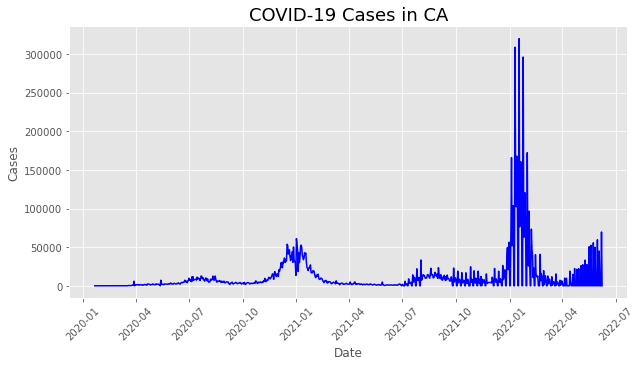

In [4]:
covid_over_time_us('CA', 'new_case')

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,ds,yhat,yhat_lower,yhat_upper
0,2022-06-09,16665.465504,0.000000,40937.360310
1,2022-06-10,17696.175464,0.000000,42375.955775
2,2022-06-11,9847.168283,0.000000,35110.084289
3,2022-06-12,9835.745282,0.000000,36293.077571
4,2022-06-13,21983.130452,0.000000,46712.427455
...,...,...,...,...
360,2023-06-04,20868.572964,0.000000,47138.833948
361,2023-06-05,33254.540522,8361.056372,59050.859969
362,2023-06-06,28495.746939,38.858758,54253.315026
363,2023-06-07,24581.352583,0.000000,50881.426691


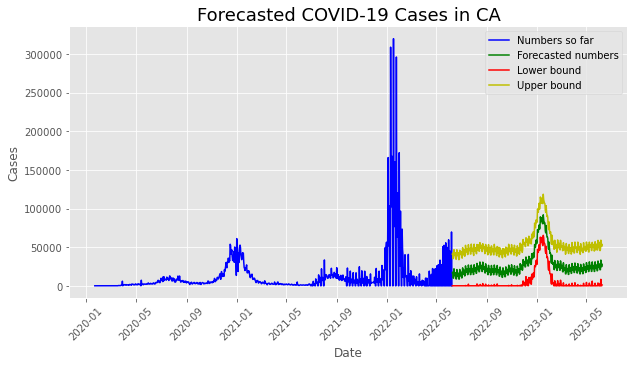

In [5]:
covid_forecasting_us('CA', 'new_case', 365)

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-09,29.087492,0.0,147.111278
1,2022-06-10,33.192548,0.0,156.555487
2,2022-06-11,0.000000,0.0,88.442924
3,2022-06-12,0.000000,0.0,85.093916
4,2022-06-13,0.000000,0.0,94.686024
...,...,...,...,...
360,2023-06-04,0.000000,0.0,88.459316
361,2023-06-05,0.000000,0.0,95.151739
362,2023-06-06,0.000000,0.0,57.873948
363,2023-06-07,0.000000,0.0,129.117592


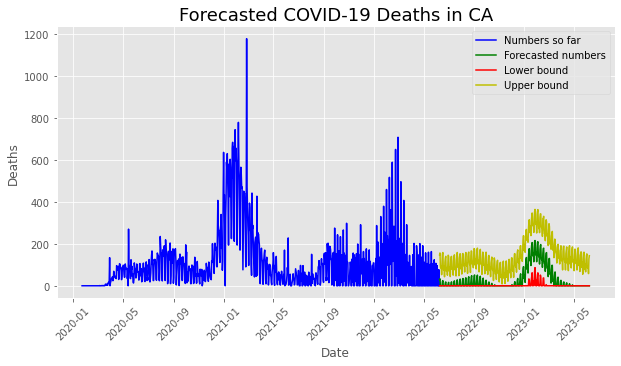

In [6]:
covid_forecasting_us('CA', 'new_death', 365)

In [7]:
help(covid_over_time_us)

Help on function covid_over_time_us in module __main__:

covid_over_time_us(state, var)
    This function creates a time series plot of either daily cases or daily deaths for a particular state. 
    state: The state on which the user would like to focus 
    var: The variable on which the user would like to focus (valid inputs are new_case and new_death 
    Output: A time series plot along with the table of values



In [8]:
help(covid_forecasting_us)

Help on function covid_forecasting_us in module __main__:

covid_forecasting_us(state, var, days)
    This function forecasts either daily cases or daily deaths for a particular state: cases, deaths, and 
    vaccinations. 
    state: The state on which the user would like to focus 
    var: The variable on which the user would like to focus (valid inputs are new_case and new_death)
    days: The number of days for which the user would like to predict values 
    Output: A time series forecast plot along with the table of forecasted values

